In [2]:
import pandas as pd
from networks import *

In [3]:
df_train = pd.read_csv("dataset/mnist_train.csv")

In [4]:
y_train = df_train["label"].to_numpy()
y_train = index_to_onehot(10, y_train)
x_train = df_train.loc[:, df_train.columns!='label']
x_train = x_train.to_numpy() / 255

In [5]:
x_train.shape

(60000, 784)

In [6]:
df_test = pd.read_csv("dataset/mnist_test.csv")

In [7]:
y_test = df_test["label"].to_numpy()
# y_test = index_to_onehot(10, y_test)
x_test = df_test.loc[:, df_test.columns!='label'].to_numpy() / 255

In [8]:
model = Sequential(
    Input(784),
    Dense(16),
    Activation("leakyrelu"),
    Dense(16),
    Activation("leakyrelu"),
    Dense(10),
    Activation("softmax")
)

In [9]:
model.compile(
    optimizer=Adam(),
    loss=CrossEntropy(),
    metrics=[MSE()]
)

In [10]:
model.summary()

Layer #   Type                          Output Shape                  Param #                       
====================================================================================================
1         Input                         (784,)                        0                             
2         Dense                         (16,)                         12560                         
3         LeakyReLU                     (16,)                         0                             
4         Dense                         (16,)                         272                           
5         LeakyReLU                     (16,)                         0                             
6         Dense                         (10,)                         170                           
7         SoftMax                       (10,)                         0                             
====================================================================================================
Total params:                                                         13002

Output()

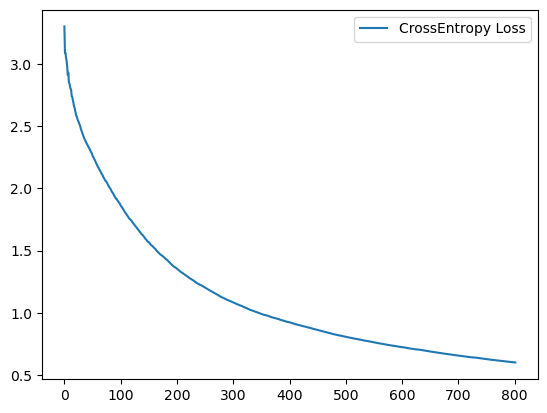

In [15]:
model.fit(x_train, y_train, epochs=500).plot()

In [21]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
f"Accuracy: {np.sum(np.where(y_pred == y_test, 1, 0)) / 100}"

'Accuracy: 91.94'

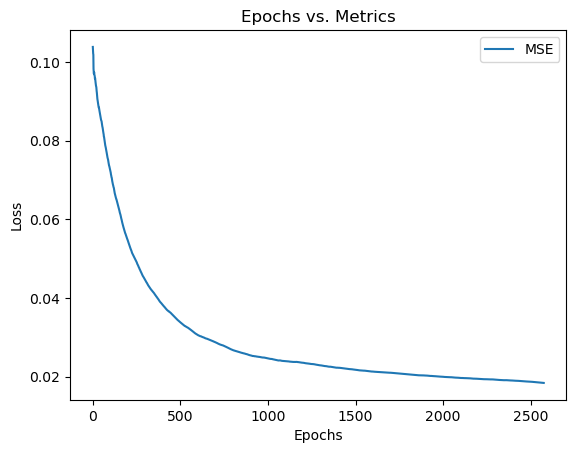

In [23]:
model.plot_metrics()

In [22]:
model.save("models/mnist-92p.pkl")